In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


## **1. Handling Missing Values**

## Effective Strategies for Handling Missing Values in Data Analysis

> **Here is a list of popular strategies to handle missing values in a dataset**

* Deleting the Missing Values
* Imputing the Missing Values
* Imputing the Missing Values for Categorical Features
* Imputing the Missing Values using Sci-kit Learn Library
* Using “Missingness” as a Feature

**There are 2 primary ways of handling missing values:**

* Deleting the Missing values
* Imputing the Missing Values

In [ ]:
data = sns.load_dataset('titanic')
data.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<Axes: >

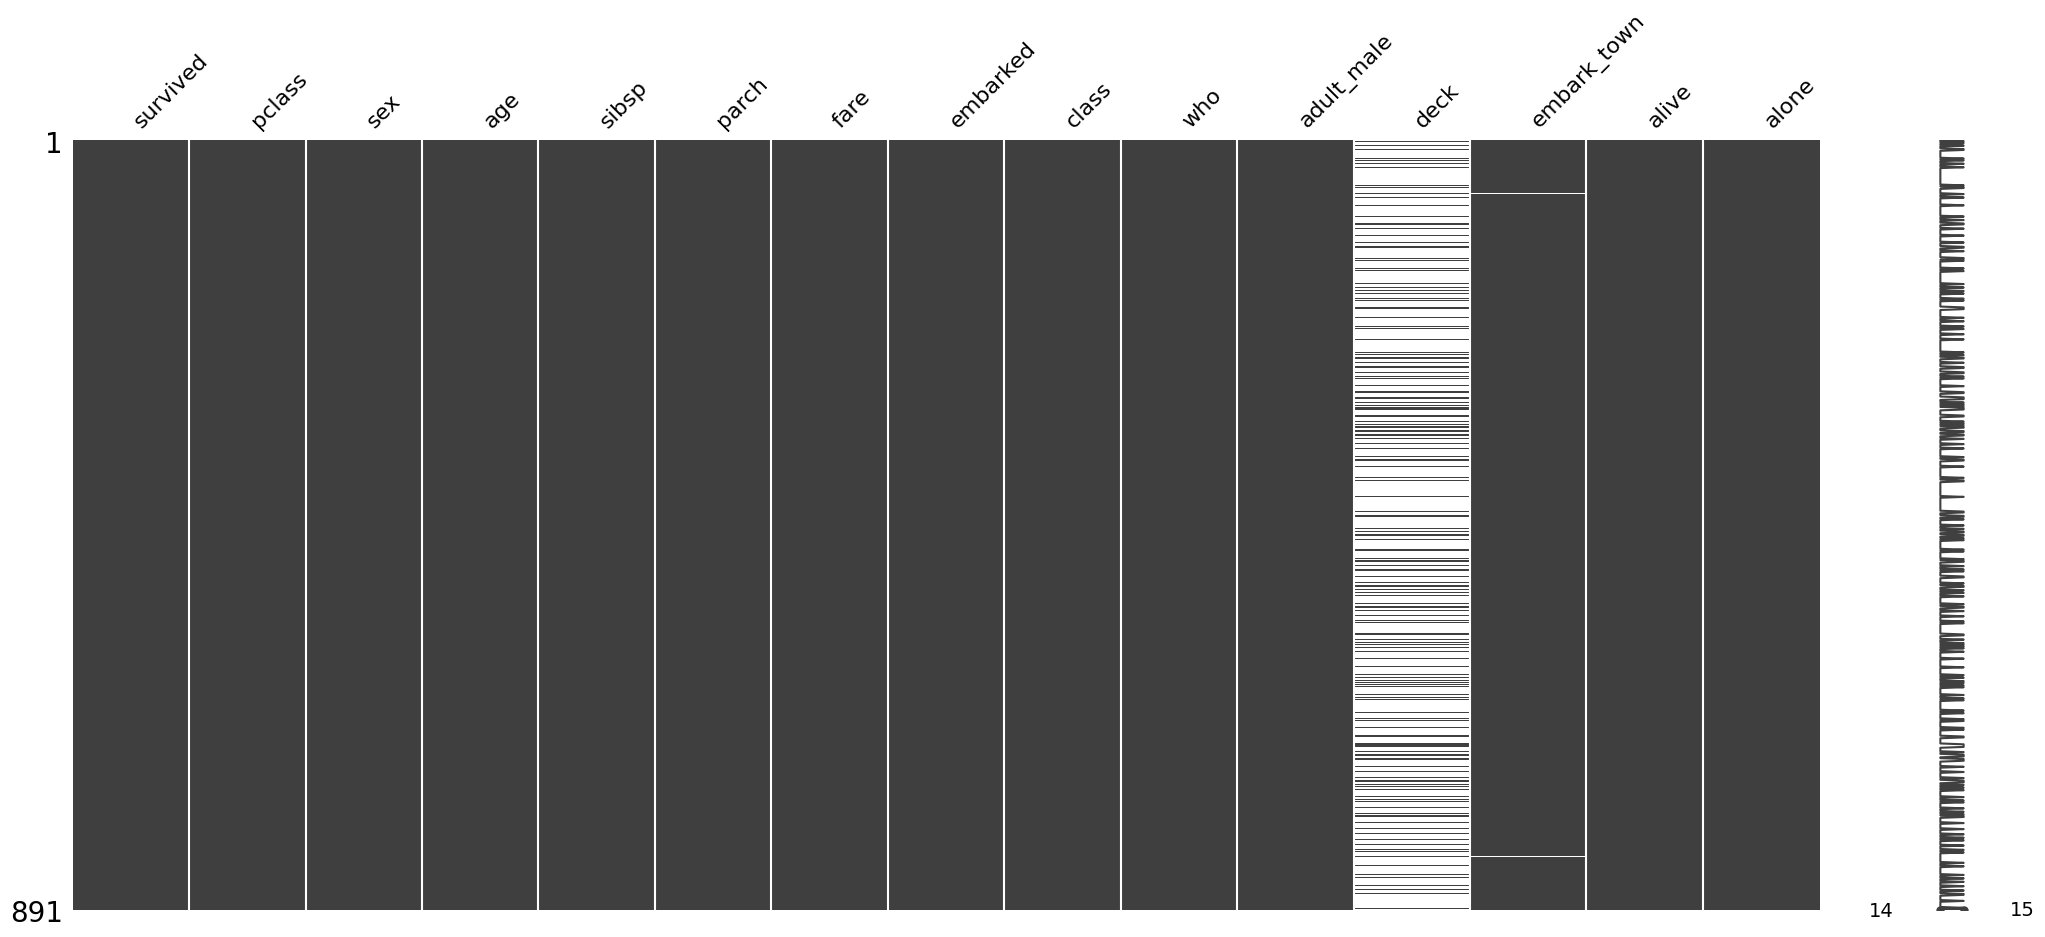

In [ ]:
import missingno as msno
msno.matrix(data)

In [ ]:
data.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


### **1. Deleting the column with missing data**
If a certain column has many missing values i.e., if majority of the datapoints has NULL value for a particular column then we can just simply drop the entire column.

 ex: 90% 0f data points are null

In [ ]:
# most of the values in the deck column are missing
data.drop('deck',axis=1).head(2) # inplace=True for permanant chages

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False


### **2. Deleting the row with missing data**

In this method we are deleting rows which has at least one NULL value. This is not the best practice because of the fact that data is information. Even though other values are non null we delete the entire row if there is at least one NULL value. For instance, if every row has some (column) value missing, you might end up deleting the whole data.

In [ ]:
data.dropna(axis=0).info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


### **3. Imputing missing values with mean/median/Mode :**
Columns in the dataset which are having numeric continuous values can be replaced with the mean, median, or mode of remaining values in the column. This method can prevent the loss of data compared to the earlier method. Replacing the above two approximations (mean, median) is a statistical approach to handle the missing values.

if the column is categorical thein use Mode(Most frequest value)

This approach is popularly used when there are small number of missing values in the data. However, when there are many missing values, mean or median results can result in a loss of variation in the data


>**Note :**

 Mean and median imputation can provide a good estimate of the missing values, respectively for normally distributed data, and skewed data.

>**When to use mean/median/mode:**

* **mean :** is the missing values are neumaric column and with out outliers If there are outliers, then the mean will not be appropriate. In such cases, outliers need to be treated first.

* **median :** it is also used for numaricala columns and It’s better to use the median value for imputation in the case of outliers.

* **mode :** Mode is the most frequently occurring value. It is used in the case of categorical features.





In [ ]:
#mean
data['age'].fillna(data['age'].mean(),inplace=True)

In [ ]:
# median
data['age'].fillna(data['age'].median(),inplace=True)

In [ ]:
data['embarked'].mode()

,embarked
0,S


In [ ]:
# mode
data['age'].fillna(data['embarked'].mode(),inplace=True)

> **3.1 Imputing missing values with mean/median of group**

We can fill the missing values using group level statistics in the following manner.

In [ ]:
data.groupby('class')['age'].transform('mean')

<ipython-input-24-82a8419f143c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('class')['age'].transform('mean')


,age
0,26.403259
1,37.048118
2,26.403259
3,37.048118
4,26.403259
...,...
886,29.866958
887,37.048118
888,26.403259
889,37.048118


### **4. Forward Fill and Backward Fill**

Forward fill (ffill) and backward fill (bfill) are methods used to fill missing values by carrying forward the last observed non-missing value (for ffill) or by carrying backward the next observed non-missing value (for bfill). These methods are particularly useful for time-series data.

>**example :**

suppose if tha data is temprature data so temperature has a seasonality in summer some one day data is missing most of the times that day temperatrure is most like the before or after day temp.
in this type of sinarios we use Ffill or Bfill.

In [ ]:
# some times you impute the missing values with group of mean
data['age'].fillna(data.groupby('class')['age'].transform('mean'),inplace=True)

# mode
data['age'].fillna(data.groupby('class')['age'].transform('median'),inplace=True)

<ipython-input-26-2784f0481496>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data['age'].fillna(data.groupby('class')['age'].transform('mean'),inplace=True)
<ipython-input-26-2784f0481496>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data['age'].fillna(data.groupby('class')['age'].transform('median'),inplace=True)


In [ ]:
data['embarked'].fillna(method='ffill',inplace=True) # dippricated

<ipython-input-19-b2d58b7ab667>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['embarked'].fillna(method='ffill',inplace=True) # dippricated


In [ ]:
# best way
data['embarked'].ffill(inplace=True)

In [ ]:
# Bfill
data['embarked'].ffill(inplace=True)

>**Note**

* Forward fill uses the last valid observation to fill missing values.
* Backward fill uses the next valid observation to fill missing values.

### **5. Interpolation**
Interpolation is a technique used to fill missing values based on the values of adjacent datapoints. This technique is mainly used in case of time series data or in situation where the missing data points are expected to vary smoothly or follow a certain trend. It is also used in cases where it is regularly sampled data.

Interpolation can be understood as a weighted average. The weights are inversely related to the distance to its neighboring points.

In [ ]:
#linear Interpolation
data['age'].interpolate(method='linear',inplace=True)

In [ ]:
# quadratic interpolation
data['embarked'].interpolate(method='quadratic',inplace=True)

<ipython-input-26-83fcac539c3a>:2: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data['embarked'].interpolate(method='quadratic',inplace=True)


In [ ]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

* **SImple Imputer**
 * simple Inputer Univariate imputer for completing missing values with simple strategies.

Replace missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column, or using a constant value.



In [ ]:
# simple Imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean',)
X_imputed = imputer.fit_transform(data[['age']])
X_imputed[:7]

array([[22.        ],
       [38.        ],
       [26.        ],
       [35.        ],
       [35.        ],
       [29.69911765],
       [54.        ]])

In [ ]:
from warnings import simplefilter
from  sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan,strategy='median')
x_imputed = imputer.fit_transform(data[['age']])
x_imputed[:7]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [28.],
       [54.]])

if the fearue is categorical



In [ ]:
# Constent
from warnings import simplefilter
from  sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan,strategy='constant')
x_imputed = imputer.fit_transform(data[['embarked']])
x_imputed[:7]

array([['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S']], dtype=object)

In [ ]:
# most frequent
from warnings import simplefilter
from  sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')# most frequent
x_imputed = imputer.fit_transform(data[['embarked']])
x_imputed[:7]

array([['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S']], dtype=object)

In [ ]:
# to see the unique values in the embarked field
data['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### **6. Multiple Imputation**
The Iterative Imputer is a method for imputing missing values in a dataset. It belongs to the scikit-learn library and implements the Multiple Imputation by Chained Equations (MICE) algorithm. MICE is an iterative imputation approach that imputes missing values one variable at a time, conditioned on the other variables.

Suppose the feature ‘age’ is well correlated with the feature ‘Fare’ such that people with lower fares are also younger and people with higher fares are also older. In that case, it would make sense to impute low age for low fare values and high age for high fare values. So here, we are taking multiple features into account by following a multivariate approach.

In [ ]:
import sklearn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

cols = ['sibsp', 'fare', 'age'] #only numarical values
X = data[cols]

impute_it = IterativeImputer()
impute_it.fit_transform(X)

array([[ 1.        ,  7.25      , 22.        ],
       [ 1.        , 71.2833    , 38.        ],
       [ 0.        ,  7.925     , 26.        ],
       ...,
       [ 1.        , 23.45      , 26.82938751],
       [ 0.        , 30.        , 26.        ],
       [ 0.        ,  7.75      , 32.        ]])

Now let’s see how IterativeImputer works. For all rows in which ‘Age’ is not missing, sci-kit learn runs a regression model. It uses ‘Sib sp’ and ‘Fare’ as the features and ‘Age’ as the target. And then, for all rows for which ‘Age’ is missing, it makes predictions for ‘Age’ by passing ‘Sib sp’ and ‘Fare’ to the training model. So it actually builds a regression model with two features and one target and then makes predictions on any places where there are missing values. And those predictions are the imputed values.

>**Choosing the Right Estimator**

* The IterativeImputer allows the use of different estimators to model the missing values. Common choices include:

 * **BayesianRidge:** A linear regression model with Bayesian regularization.
 * **DecisionTreeRegressor:** A non-linear model that can capture complex relationships.
 * **ExtraTreesRegressor:** An ensemble method that averages multiple decision trees.
 * **KNeighborsRegressor:** A non-parametric method that uses the nearest neighbors to estimate missing values.

In [ ]:
# iterative imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import  DecisionTreeClassifier

cols = ['embarked', 'fare', 'age'] # remember of the values are discreate or continues()need to explore)
X = data[cols]

imputer = IterativeImputer(estimator=DecisionTreeClassifier(),max_iter=10,random_state=0)
X_imputed = imputer.fit_transform(X)


ValueError: could not convert string to float: 'S'

here both numarical and categorical values  to imputer

to transform catogarical values we using labe encoding...

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['embarked'] = encoder.fit_transform(data['embarked'])

data['embarked'].head(5) # noe it is in numarical

,embarked
0,2
1,0
2,2
3,2
4,2


In [ ]:
data['embark_town'] = encoder.fit_transform(data['embark_town'])

In [ ]:
from sklearn.experimental import enable_iterative_imputer # because it is still in experimental
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsClassifier


cols = ['embarked', 'embark_town']
X = data[cols]

imputer = IterativeImputer(estimator=KNeighborsClassifier() ,max_iter=10,random_state=0)  # with KNN
X_imputed = imputer.fit_transform(X)
X_imputed[:6]

array([[2., 2.],
       [0., 0.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [1., 1.]])

In [ ]:
from sklearn.experimental import enable_iterative_imputer # because it is still in experimental
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier


cols = ['embarked', 'embark_town']
X = data[cols]

imputer = IterativeImputer(estimator=DecisionTreeClassifier() ,max_iter=10,random_state=0)  # with decisoin Tree
X_imputed = imputer.fit_transform(X)
X_imputed[:6]

array([[2., 2.],
       [0., 0.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [1., 1.]])

In [ ]:
from sklearn.experimental import enable_iterative_imputer # because it is still in experimental
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier


cols = [ 'embarked', 'embark_town']
X = data[cols]

imputer = IterativeImputer(estimator=RandomForestClassifier(),max_iter=10,random_state=0)  # with random forwest
X_imputed = imputer.fit_transform(X)
X_imputed[:6]

array([[2., 2.],
       [0., 0.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [1., 1.]])

### **7. K-Nearest Neighbors Imputations (KNNImputer)**
Imputing missing values using k-Nearest Neighbors (KNN) is a technique where missing values are estimated based on the values of their nearest neighbors in the feature space.

The idea is to find the k nearest data points and use their values to impute the missing values.

In [ ]:
# for single column
from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(data[['age']])
X_imputed[:11] # first 10 rows

array([[22.        ],
       [38.        ],
       [26.        ],
       [35.        ],
       [35.        ],
       [29.69911765],
       [54.        ],
       [ 2.        ],
       [27.        ],
       [14.        ],
       [ 4.        ]])

#### With multiple columns

In [ ]:
from sklearn.impute import KNNImputer


df = data[["survived", "pclass", "sex", "sibsp", "parch", "fare", "age"]]
df = pd.get_dummies(df, columns=['sex'], drop_first=True)

# Assuming df is your DataFrame with missing values
# For demonstration purposes, let's assume 'Age' is the target variable

In [ ]:
df

,survived,pclass,sibsp,parch,fare,age,sex_male
0,0,3,1,0,7.2500,22.0,True
1,1,1,1,0,71.2833,38.0,False
2,1,3,0,0,7.9250,26.0,False
3,1,1,1,0,53.1000,35.0,False
4,0,3,0,0,8.0500,35.0,True
...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,27.0,True
887,1,1,0,0,30.0000,19.0,False
888,0,3,1,2,23.4500,22.5,False
889,1,1,0,0,30.0000,26.0,True


In [ ]:
x = df.drop('age',axis=1)
y = df['age']

imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(x)

In [ ]:
X_imputed

array([[ 0.    ,  3.    ,  1.    ,  0.    ,  7.25  ,  1.    ],
       [ 1.    ,  1.    ,  1.    ,  0.    , 71.2833,  0.    ],
       [ 1.    ,  3.    ,  0.    ,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 0.    ,  3.    ,  1.    ,  2.    , 23.45  ,  0.    ],
       [ 1.    ,  1.    ,  0.    ,  0.    , 30.    ,  1.    ],
       [ 0.    ,  3.    ,  0.    ,  0.    ,  7.75  ,  1.    ]])

In [ ]:
df.columns

Index(['survived', 'pclass', 'sibsp', 'parch', 'fare', 'age', 'sex_male'], dtype='object')

In [ ]:
pd.DataFrame(X_imputed,columns=['survived', 'pclass', 'sibsp', 'parch', 'fare', 'sex_male']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    float64
 1   pclass    891 non-null    float64
 2   sibsp     891 non-null    float64
 3   parch     891 non-null    float64
 4   fare      891 non-null    float64
 5   sex_male  891 non-null    float64
dtypes: float64(6)
memory usage: 41.9 KB


In [ ]:
pd.DataFrame(X_imputed,columns=['survived', 'pclass', 'sibsp', 'parch', 'fare', 'sex_male']).describe()

,survived,pclass,sibsp,parch,fare,sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,32.204208,0.647587
std,0.486592,0.836071,1.102743,0.806057,49.693429,0.477990
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200,1.000000
